<a href="https://colab.research.google.com/github/Alejandro-ZZ/Machine-Learning-UNS/blob/master/2_1_Exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis exploratorio**

Se realizará un análisis exploratorio general para conocer el comportamiento de los datos y observar si existen variables que presenten anormalidades.
<br><br>
La información se toma de dos repositorios con datasets (extraídos de los [datos abiertos y públicos de Bahía Blanca](https://datos.bahia.gob.ar/dataset?groups=covid19)) que contienen información sobre la situación sanitaria y epidemiológica de la municipalidad de Bahía Blanca, Argentina.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **1. Casos COVID-19**

Lectura de los casos de contagio COVID-19 en la ciudad de Bahia Blanca, Argentina.

In [ ]:
url = 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv'
cases = pd.read_csv(url)
cases

,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
0,2020-06-30,106,29,71,6,574,23,342,2338,181,0
1,2020-07-01,114,31,77,6,581,22,342,2207,172,0
2,2020-07-02,124,40,78,6,588,24,356,2162,176,0
3,2020-07-03,137,53,78,6,606,31,356,2353,190,0
4,2020-07-04,154,70,78,6,622,31,356,2377,214,0
...,...,...,...,...,...,...,...,...,...,...,...
83,2020-09-21,2589,1319,1209,61,3557,303,417,1261,510,0
84,2020-09-22,2714,1371,1282,61,3615,292,417,1197,554,0
85,2020-09-23,2841,1464,1313,64,3658,286,417,1206,562,0
86,2020-09-24,2906,1474,1366,66,3682,331,417,1221,562,0


Se procede a conocer el comportamiento temporal de las variables.


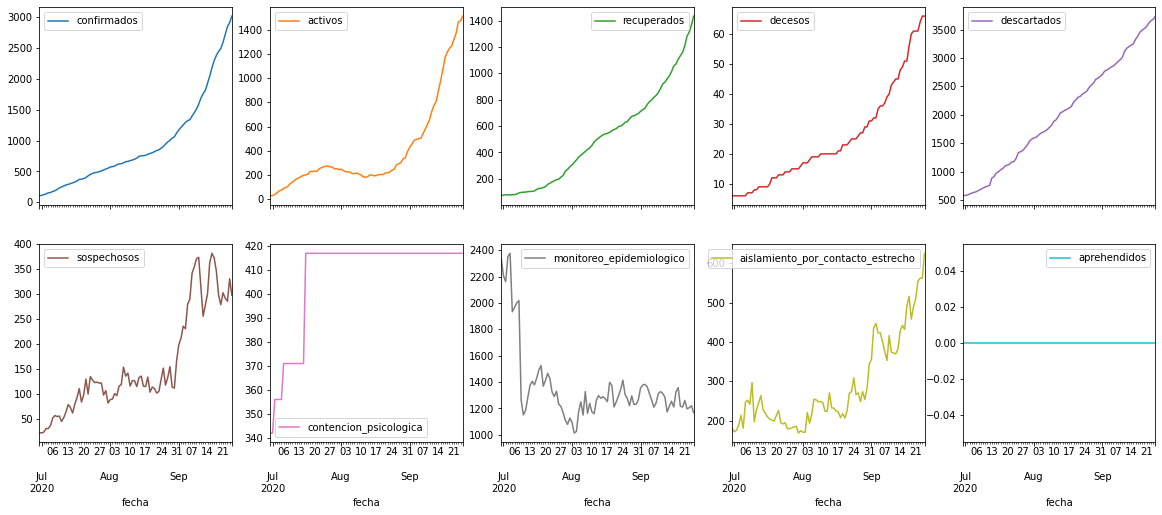

In [ ]:
cases['fecha'] = pd.to_datetime(cases['fecha'])
cases.plot(x = 'fecha', subplots = True, legend = True, figsize = (20, 8), layout = (2, 5))
plt.show()

Se observan los siguientes aspectos:

*   En las primeras cinco gráficas (`confirmados`, `activos`, `recuperados`, `decesos` y `descartados`) se observa la suma acumulada de los casos. Esto se plantea debido a que su comportamiento es únicamente ascendente. 

*   La variable `aprehendidos` presenta un valor constante de 0.

*   Los datos en `contencion_psicologica` presenta un crecimiento hasta alrededor del 16 de Julio, a partir de esa fecha, el valor pasar a ser constante (aproximadamente de 418). Un indicio de ello, puede ser a que la variable no se siguió implementando o no hubo más seguimiento.






### **2. Camas COVID-19**

Lectura de una estadística/seguimiento de las camas implementadas para pacientes COVID-19 en la ciudad de Bahia Blanca, Argentina.


Dentro de las variables en seguimiento se destaca las siguientes siglas:

  * **UTI** = Unidad de Terapia Intensiva

  * **UCMA** = Unidad de Cuidados Mínimos Ambulatorios

In [ ]:
url = 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv'
beds = pd.read_csv(url)
beds

,informeNumero,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
0,131,2020-09-25,848,401,47,163,42,84,77,32,24,142,41,69,25,147,19,4,NaN
1,130,2020-09-24,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4,NaN
2,129,2020-09-23,848,402,47,163,21,85,65,32,22,142,42,71,23,147,19,4,NaN
3,128,2020-09-22,848,391,46,163,30,83,69,32,21,142,43,72,24,147,15,4,NaN
4,127,2020-09-21,848,368,43,163,32,82,69,32,24,142,40,72,24,147,10,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,10,2020-07-04,848,343,40,155,14,14,18,32,3,143,22,0,0,137,0,3,NaN
84,9,2020-07-03,848,349,41,155,18,13,20,32,4,143,25,0,0,137,0,3,NaN
85,8,2020-07-02,848,358,42,155,14,14,18,32,4,143,25,0,0,137,0,3,NaN
86,7,2020-07-01,848,386,45,155,12,12,15,32,2,143,24,0,0,137,0,3,NaN


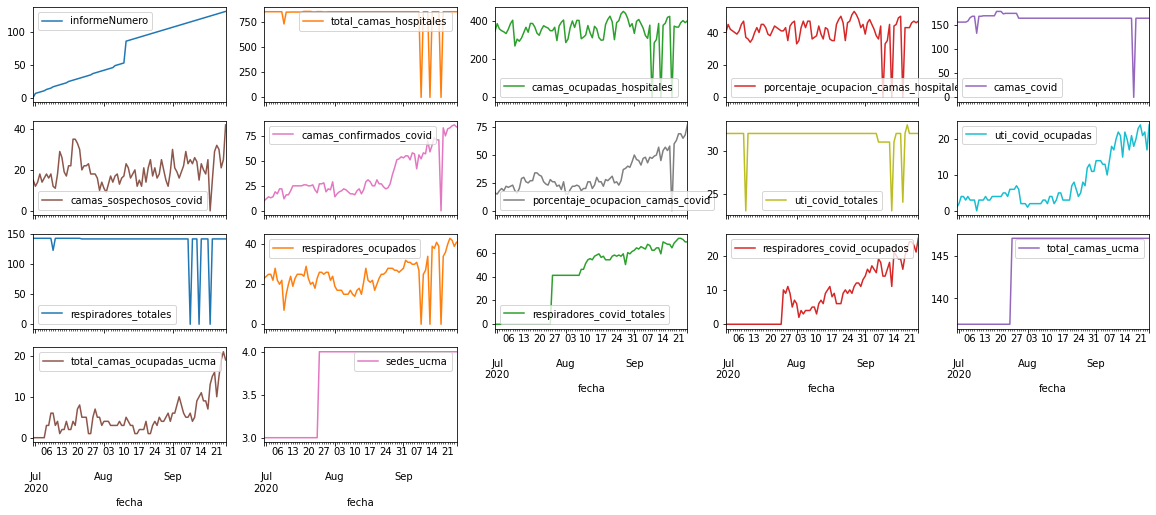

In [ ]:
beds['fecha'] = pd.to_datetime(beds['fecha'])
beds.plot(x = 'fecha', subplots = True, legend = True, figsize = (20, 8), layout = (4, 5))
plt.show()

*   Lo primero que se observa es que la gráfica de `informeNumero` empieza con un incremento normal, pero al rededor del 10 de agosto presenta un cambio abrupto en el valor. Esto se puede dar a un retraso en la carga de datos.

*   En algunos gráficos relacionados con los respiradores, camas y Unidad de Terapia Intensiva (UTI), existen días donde su valor es cero. Para un análisis de estos, deberían eliminarse o promediarse.

* En el momento que se habilitan 4 sedes UCMA (a finales de Julio) el valor de las camas totales de las sedes pasa a un valor constante de 147.

* A finales de Julio se empiezan a implementar respiradores para pacientes COVID.

